# Use a label sample to calibrate the estimation on a base dataset

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from util import plot_stacked_frequency
from util import DataHandler, PerfectCalibrationCurve, NPBinningCalibrationCurve, ProbabilityEstimator

## 1. Load an unlabeled dataset

In [2]:
# base is a very large dataset
base_dh = DataHandler('data/dataset1_base.csv')

In [3]:
# TODO: change the dataset to 'data/dataset1_target.csv'
# base_dh = DataHandler('data/dataset1_target.csv')

In [4]:
# you observe only classifier scores C(X), but no GT labels
base_dh.observed_df

,C(X),GT
0,0.506476,
1,0.266516,
2,0.805071,
3,0.651791,
4,0.140691,
...,...,...
999995,0.497592,
999996,0.129006,
999997,0.380913,
999998,0.859169,


In [5]:
# count_gt() function returns the number of items with GT labels
base_dh.count_gt()

0

## 2. Assume that we have some budget to obtain the GT labels

In [6]:
# the `get_oracle_labels` function will get the GT labels for specifc rows
base_dh.get_oracle_labels(rows=[0, 1, 2])

In [7]:
base_dh.observed_df

,C(X),GT
0,0.506476,False
1,0.266516,False
2,0.805071,True
3,0.651791,
4,0.140691,
...,...,...
999995,0.497592,
999996,0.129006,
999997,0.380913,
999998,0.859169,


In [8]:
# we can also get a subset of all labeled rows
base_dh.sample_df

,C(X),GT
0,0.506476,False
1,0.266516,False
2,0.805071,True


### 2.1 Random sampling

In [25]:
sampeld_rows = base_dh.get_sample_for_labeling(n_item=5000, strategy='random')

In [26]:
base_dh.get_oracle_labels(rows=sampeld_rows)

In [27]:
base_dh.count_gt()

5000

In [28]:
base_dh.sample_df

,C(X),GT
227,0.284912,False
233,0.196363,False
368,0.633292,True
488,0.342419,False
818,0.531370,False
...,...,...
999064,0.190082,False
999454,0.159329,False
999487,0.255996,False
999898,0.665812,False


In [29]:
random_sample_df = base_dh.sample_df

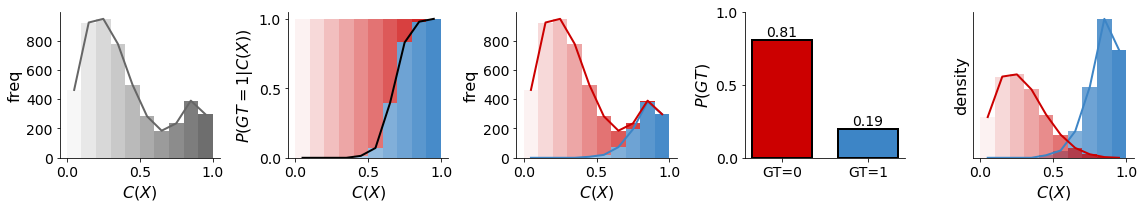

In [30]:
base_dh.generate_all_distribution_plots(df=random_sample_df, num_bin=10)

In [ ]:
def estimator(dh, labeled_df):
    # get a calibration curve for this labeled df and distribution of C(X) of the observed 1M df
    # run our intergral to get an estimation

### Estimating with confidence interval by Bootstrap sampling

In [42]:
pcc_estimator = ProbabilityEstimator()

base_calibration_curve = NPBinningCalibrationCurve(random_sample_df, num_bin=100)

pcc_estimator.set_calibration_curve(base_calibration_curve)
input_cx_array = base_dh.observed_df['C(X)'].values

pcc_estimator.estimate(input_cx_array)

0.19799444131467844

In [ ]:
num_bootstrap = 1000
# sample with replacement on the 5000 labeled df

pe_estimator = ProbabilityEstimator()
input_cx_array = base_dh.observed_df['C(X)'].values

estimated_result_list = []

for _ in range(num_bootstrap):
    n_item = len(random_sample_df)
    bootstrapped_sample_df = random_sample_df.sample(n=None, frac=1, replace=True)
    
    base_calibration_curve = NPBinningCalibrationCurve(bootstrapped_sample_df, num_bin=100)
    pcc_estimator.set_calibration_curve(base_calibration_curve)

    pe_estimate = pcc_estimator.estimate(input_cx_array)
    estimated_result_list.append()
    
for _ in range(num_bootstraps):
    # get a bootstraped sample
    # run the estimator
    estimated_result_list.append()
    

np.median(), 2.5th, 97.5th percentile

In [ ]:
# plot the bar chart with error bars

## Why 

### 2.2 Uniform sampling on C(X)

check if uniform will give us a tighter confidence intervals

In [31]:
base_dh.hide_all_oracle()

In [32]:
base_dh.count_gt()

0

In [33]:
sampeld_rows = base_dh.get_sample_for_labeling(n_item=5000, strategy='uniform on C(X)')

In [34]:
base_dh.get_oracle_labels(rows=sampeld_rows)

In [35]:
base_dh.count_gt()

5000

In [36]:
base_dh.sample_df

,C(X),GT
0,0.506476,False
1,0.266516,False
2,0.805071,True
3,0.651791,True
4,0.140691,False
...,...,...
11982,0.663697,False
12005,0.661057,False
12011,0.606818,True
12138,0.620298,False


In [37]:
purposive_sample_df = base_dh.sample_df

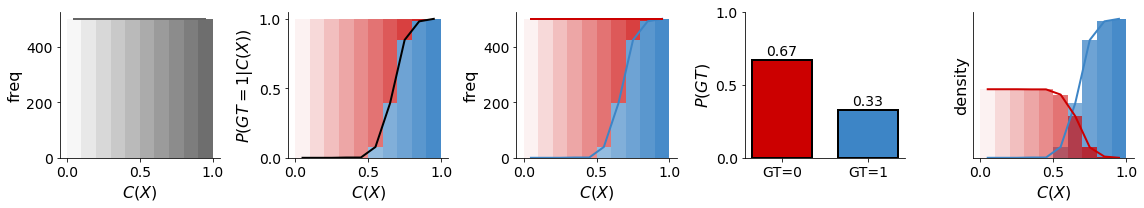

In [38]:
base_dh.generate_all_distribution_plots(df=purposive_sample_df, num_bin=10)

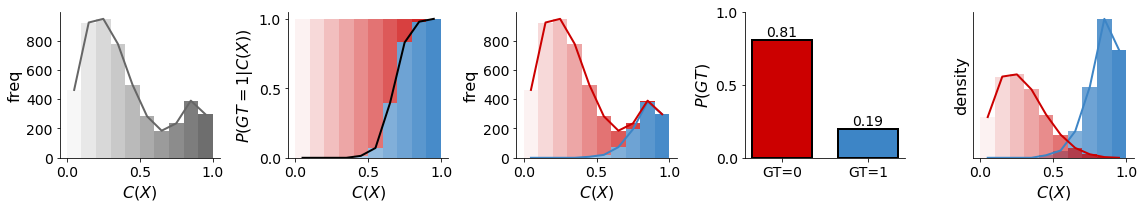

In [39]:
base_dh.generate_all_distribution_plots(df=random_sample_df, num_bin=10)

In [ ]:
base_dh.reset_oracle()

In [ ]:
base_dh.count_gt()

In [ ]:
base_dh.observed_df

In [ ]:
base_dh.get_oracle_labels(rows=sampeld_rows)

In [ ]:
base_dh.load_features(features=['has_url', 'lang'])

In [ ]:
base_dh.observed_df

In [ ]:
Estimator(base_dh, calibration_curve_base)

## Sec 3. Extrapolation phase

show the five distribution plots for the base period in one row

### 3.1 Borrow the calibration curve learned from the base dataset

In [ ]:
PE_Estimator(target_dh, calibration_curve_base)

In [ ]:
# fill in the result spreadsheet

### 3.3 Borrow the class-conditional densities learned from the base dataset

Introduce the MM model

In [ ]:
MM_Estimator(target_dh, class_density_base)

In [ ]:
# bootstrap

# Let's first try some approaches

Given: classifier scores UC(X)

Target: P(GT=1)

## 1. Classify and Count (threshold = 0.5)

In [ ]:
threshold = 0.5
est_p_cc = base_dh.observed_df[base_dh.observed_df['UC(X)'] > threshold].shape[0] / base_dh.size
est_p_cc

In [ ]:
base_dh._p_gt

## 2. Probabilistic Estimator

In [ ]:
est_p_pe = base_dh.observed_df['UC(X)'].sum() / base_dh.size
est_p_pe

In [ ]:
base_dh._p_gt

# 3. Now assume we have some budget to label some data

In [ ]:
base_dh.count_gt()

In [ ]:
base_dh.size

In [ ]:
# let's label 20% data
num_sample = int(0.1 * base_dh.size)
num_sample

In [ ]:
sampeld_rows = base_dh.get_sample_for_labeling(n_item=num_sample, strategy='random')

In [ ]:
base_dh.get_oracle_labels(rows=sampeld_rows)

In [ ]:
base_dh.count_gt()

In [ ]:
labeled_sample = base_dh.get_labeled_sample()

In [ ]:
labeled_sample.shape

In [ ]:
labeled_sample.loc[:, 'GT'] = labeled_sample['GT'].astype('bool')

In [ ]:
labeled_sample

## 3.1 Learn the optimal threshold by F1

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
roc_auc_score(labeled_sample['GT'].values, labeled_sample['UC(X)'].values)

In [ ]:
labeled_sample['UC(X)'].map(lambda x: True if x > 0.3 else False).values

In [ ]:
best_threshold = 0
best_f1 = 0

for thres in np.linspace(0, 1, 101):
    f1 = f1_score(labeled_sample['GT'].values,
             labeled_sample['UC(X)'].map(lambda x: True if x >= thres else False).values)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thres

best_threshold, best_f1

## with the best threshold

In [ ]:
est_p_cc = base_dh.observed_df[base_dh.observed_df['UC(X)'] >= best_threshold].shape[0] / base_dh.size
est_p_cc

## 3.2 learn a platt scaling function

In [ ]:
labeled_sample

In [ ]:
train_UCX = labeled_sample['UC(X)'].values.reshape(-1, 1)
train_GT = labeled_sample['GT'].values
prob_cali_func = LogisticRegression(fit_intercept=True).fit(train_UCX, train_GT)

In [ ]:
base_dh.plot_calibration_curve(df=base_dh.sample_df, num_bin=100, method='platt scaling', title='sample_calibration_curve')

In [ ]:
labeled_sample = base_dh.get_labeled_sample()
items = [(cx, gt) for cx, gt in zip(labeled_sample['UC(X)'].values, labeled_sample['GT'].values)]
num_sample = len(items)

In [ ]:
# bootstrap for CI
num_bootstrap = 1000
results = np.zeros((num_bootstrap, 101))
est_result_list = []
target_results = np.zeros((num_bootstrap, 101))
target_result_list = []

In [ ]:
empir_cx_axis = np.linspace(0, 1, 101)
for idx in range(num_bootstrap):
    bootstrapped_items = random.choices(items, k=num_sample)
    bootstrapped_train_UCX = np.array([cx for cx, gt in bootstrapped_items]).reshape(-1, 1)
    bootstrapped_train_GT = np.array([gt for cx, gt in bootstrapped_items])
    bootstrapped_prob_cali_func = LogisticRegression(solver='lbfgs', fit_intercept=True).fit(bootstrapped_train_UCX, bootstrapped_train_GT)

    bootstrapped_prob_cali_curve = bootstrapped_prob_cali_func.predict_proba(empir_cx_axis.reshape(-1, 1))[:, -1]
    results[idx, :] = bootstrapped_prob_cali_curve.reshape(1, -1)
    
    bootstrapped_cali_prob_scores = bootstrapped_prob_cali_func.predict_proba(base_dh.observed_df['UC(X)'].values.reshape(-1, 1))[:, -1]
    est_pcc = bootstrapped_cali_prob_scores.sum() / len(bootstrapped_cali_prob_scores)
    est_result_list.append(est_pcc)    
    
    bootstrapped_cali_prob_scores = bootstrapped_prob_cali_func.predict_proba(target_dh.observed_df['UC(X)'].values.reshape(-1, 1))[:, -1]
    est_pcc = bootstrapped_cali_prob_scores.sum() / len(bootstrapped_cali_prob_scores)
    target_result_list.append(est_pcc) 

In [ ]:
results

In [ ]:
np.median(est_result_list), np.percentile(est_result_list, q=2.5), np.percentile(est_result_list, q=97.5)

In [ ]:
target_dh._p_gt

In [ ]:
np.median(target_result_list), np.percentile(target_result_list, q=2.5), np.percentile(target_result_list, q=97.5)

In [ ]:
results.shape

In [ ]:
empir_cx_axis = np.linspace(0, 1, 101)

mediaum_prob_cali_curve = np.median(results, axis=0)
lower_prob_cali_curve = np.percentile(results, q=2.5, axis=0)
upper_prob_cali_curve = np.percentile(results, q=97.5, axis=0)

plt.plot(empir_cx_axis, mediaum_prob_cali_curve)
plt.fill_between(empir_cx_axis, lower_prob_cali_curve, upper_prob_cali_curve, facecolor='r', alpha=0.2)

In [ ]:
cali_prob_scores = prob_cali_func.predict_proba(base_dh.observed_df['UC(X)'].values.reshape(-1, 1))[:, -1]

In [ ]:
cali_prob_scores.sum() / len(cali_prob_scores)

## 3.3 learn the class-conditional density function

In [ ]:
# bootstrap for CI
num_bootstrap = 100
pos_results = np.zeros((num_bootstrap, 10))
neg_results = np.zeros((num_bootstrap, 10))

est_result_list = []
target_result_list = []

In [ ]:
for idx in range(num_bootstrap):
    bootstrapped_items = random.choices(items, k=num_sample)
    bootstrapped_train_UCX = np.array([cx for cx, gt in bootstrapped_items]).reshape(-1, 1)
    bootstrapped_train_GT = np.array([gt for cx, gt in bootstrapped_items])
    
    obs_freq, _ = np.histogram(bootstrapped_train_UCX, bins=np.linspace(0, 1, 11))
    pos_freq, _ = np.histogram(bootstrapped_train_UCX[bootstrapped_train_GT == True], bins=np.linspace(0, 1, 11))
    neg_freq, _ = np.histogram(bootstrapped_train_UCX[bootstrapped_train_GT == False], bins=np.linspace(0, 1, 11))
    
    obs_freq = obs_freq / obs_freq.sum()
    pos_freq = pos_freq / pos_freq.sum()
    neg_freq = neg_freq / neg_freq.sum()
    
    pos_results[idx, :] = pos_freq
    neg_results[idx, :] = neg_freq
    
    min_dist = 100
    best_p_p = 0

    for p_p in np.linspace(0, 1, 101):
        dist = hellinger(obs_freq, pos_freq * p_p + neg_freq * (1 - p_p))
        if dist < min_dist:
            min_dist = dist
            best_p_p = p_p
    
    est_result_list.append(best_p_p)
    
    target_obs_freq, _ = np.histogram(target_dh.observed_df['UC(X)'].values, bins=np.linspace(0, 1, 11))
    target_obs_freq = target_obs_freq / target_obs_freq.sum()
    
    min_dist = 100
    best_p_p = 0

    for p_p in np.linspace(0, 1, 101):
        dist = hellinger(target_obs_freq, pos_freq * p_p + neg_freq * (1 - p_p))
        if dist < min_dist:
            min_dist = dist
            best_p_p = p_p

    target_result_list.append(best_p_p)    

In [ ]:
np.median(est_result_list), np.percentile(est_result_list, q=2.5), np.percentile(est_result_list, q=97.5)

In [ ]:
np.median(target_result_list), np.percentile(target_result_list, q=2.5), np.percentile(target_result_list, q=97.5)

In [ ]:
target_dh._p_gt

In [ ]:
plt.hist(labeled_sample['UC(X)'].values, bins=np.linspace(0, 1, 11))

In [ ]:
obs_freq, _, _ = plt.hist(base_dh.observed_df['UC(X)'].values, bins=np.linspace(0, 1, 11))

In [ ]:
obs_freq /= obs_freq.sum()

In [ ]:
pos_freq, _, _ = plt.hist(labeled_sample[labeled_sample['GT'] == True]['UC(X)'].values, bins=np.linspace(0, 1, 11), alpha=0.5)
neg_freq, _, _ = plt.hist(labeled_sample[labeled_sample['GT'] == False]['UC(X)'].values, bins=np.linspace(0, 1, 11), alpha=0.5)

In [ ]:
mediaum_pos_density = np.median(pos_results, axis=0)
lower_pos_density = np.percentile(pos_results, q=2.5, axis=0)
upper_pos_density = np.percentile(pos_results, q=97.5, axis=0)

mediaum_neg_density = np.median(neg_results, axis=0)
lower_neg_density = np.percentile(neg_results, q=2.5, axis=0)
upper_neg_density = np.percentile(neg_results, q=97.5, axis=0)

empir_cx_axis = np.linspace(0, 1, 10)

plt.plot(empir_cx_axis, mediaum_pos_density)
plt.fill_between(empir_cx_axis, lower_pos_density, upper_pos_density, alpha=0.2)

plt.plot(empir_cx_axis, mediaum_neg_density)
plt.fill_between(empir_cx_axis, lower_neg_density, upper_neg_density, alpha=0.2)

In [ ]:
pos_freq /= pos_freq.sum()
neg_freq /= neg_freq.sum()

In [ ]:
_SQRT2 = np.sqrt(2)

def hellinger(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / _SQRT2

In [ ]:
min_dist = 100
best_p_p = 0

for p_p in np.linspace(0, 1, 101):
    dist = hellinger(obs_freq, pos_freq * p_p + neg_freq * (1 - p_p))
    if dist < min_dist:
        min_dist = dist
        best_p_p = p_p

In [ ]:
best_p_p, min_dist

# 4. estimate for the target period

## 4.1 PCC

In [ ]:
target_cali_prob_scores = prob_cali_func.predict_proba(target_dh.observed_df['UC(X)'].values.reshape(-1, 1))[:, -1]

In [ ]:
target_cali_prob_scores.sum() / len(target_cali_prob_scores)

## 4.2 MM

In [ ]:
target_obs_freq, _, _ = plt.hist(target_dh.observed_df['UC(X)'].values, bins=np.linspace(0, 1, 11))

In [ ]:
min_dist = 10000
best_p_p = 0

for p_p in np.linspace(0, 1, 101):
    dist = hellinger(target_obs_freq, pos_freq * p_p + neg_freq * (1 - p_p))
    if dist < min_dist:
        min_dist = dist
        best_p_p = p_p

In [ ]:
best_p_p, min_dist

# Target

In [ ]:
target_dh = DataHandler('data/dataset1_target.csv')

In [ ]:
target_dh.plot_dist_classifier_scores(num_bin=100, title='target_dist_classifier_scores')

In [ ]:
median_calibration_curve = np.median(results, axis=0)

In [ ]:
target_dh.get_pcc(num_bin=100, calibration_curve=median_calibration_curve, title='target_pcc_stacked_frequency')

In [ ]:
target_dh.plot_dist_gt_labels(set_pp=True, p_p=np.median(target_result_list), title='target_pcc_dist_gt_labels')